In [65]:
import numpy as np 

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

train_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')

In [67]:
train_data.head()
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [68]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [69]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [70]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [71]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [72]:
train_data=train_data.drop(columns='Unnamed: 0')
test_data=test_data.drop(columns='Unnamed: 0')

In [73]:
encoder=LabelEncoder()
train_data['merchant']=encoder.fit_transform(train_data['merchant'])
train_data['category']=encoder.fit_transform(train_data['category'])
train_data['street']=encoder.fit_transform(train_data['street'])
train_data['job']=encoder.fit_transform(train_data['job'])
train_data['trans_num']=encoder.fit_transform(train_data['trans_num'])
train_data['first']=encoder.fit_transform(train_data['first'])
train_data['city']=encoder.fit_transform(train_data['city'])
train_data['state']=encoder.fit_transform(train_data['state'])
train_data['last']=encoder.fit_transform(train_data['last'])
train_data['gender']=encoder.fit_transform(train_data['gender'])
train_data['trans_date_trans_time']=encoder.fit_transform(train_data['trans_date_trans_time'])
train_data['dob']=encoder.fit_transform(train_data['dob'])



test_data['merchant']=encoder.fit_transform(test_data['merchant'])
test_data['category']=encoder.fit_transform(test_data['category'])
test_data['street']=encoder.fit_transform(test_data['street'])
test_data['job']=encoder.fit_transform(test_data['job'])
test_data['trans_num']=encoder.fit_transform(test_data['trans_num'])
test_data['first']=encoder.fit_transform(test_data['first'])
test_data['city']=encoder.fit_transform(test_data['city'])
test_data['state']=encoder.fit_transform(test_data['state'])
test_data['last']=encoder.fit_transform(test_data['last'])
test_data['gender']=encoder.fit_transform(test_data['gender'])
test_data['trans_date_trans_time']=encoder.fit_transform(test_data['trans_date_trans_time'])
test_data['dob']=encoder.fit_transform(test_data['dob'])

In [74]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,162,18,0,568,526,...,36.0788,-81.1781,3495,370,779,56438,1325376018,36.011293,-82.048315,0
1,1,630423337322,241,4,107.23,309,157,0,435,612,...,48.8878,-118.2105,149,428,607,159395,1325376044,49.159047,-118.186462,0
2,2,38859492057661,390,0,220.11,115,381,1,602,468,...,42.1808,-112.2620,4154,307,302,818703,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,360,2,45.00,163,463,1,930,84,...,46.2306,-112.1138,1939,328,397,544575,1325376076,47.034331,-112.561071,0
4,4,375534208663984,297,9,41.96,336,149,1,418,216,...,38.4207,-79.4629,99,116,734,831111,1325376186,38.674999,-78.632459,0


In [75]:
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,319,10,2.86,151,115,1,341,157,...,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,591,10,29.84,163,457,0,354,16,...,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,611,5,41.28,24,249,0,865,61,...,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,222,9,60.05,42,457,1,320,764,...,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,292,13,3.19,247,261,1,548,247,...,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


In [76]:
train_data.shape ,test_data.shape

((1296675, 22), (555719, 22))

In [77]:
x_train=train_data.drop(columns='is_fraud')
y_train=train_data['is_fraud']
x_test=test_data.drop(columns='is_fraud')
y_test=test_data['is_fraud']

In [78]:
modelLR=LogisticRegression()
modelRF=RandomForestClassifier()
modelDT=DecisionTreeClassifier()

In [79]:
modelLR.fit(x_train,y_train)

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
modelDT.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
modelRF.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
predictionsLR=modelLR.predict(x_test)
predictionsRF=modelRF.predict(x_test)
predictionsDT=modelDT.predict(x_test)

In [84]:
cmLR=confusion_matrix(y_test,predictionsLR)
cmRF=confusion_matrix(y_test,predictionsRF)
cmDT=confusion_matrix(y_test,predictionsRF)

<Axes: >

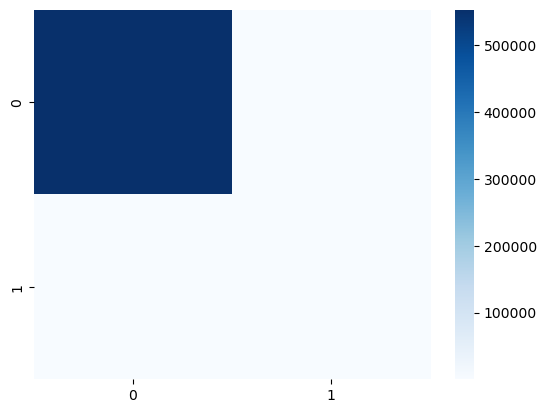

In [85]:
sns.heatmap(data=cmRF,cmap='Blues')

In [86]:
test_data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [88]:
accuracyLR=accuracy_score(y_test,predictionsLR)
accuracyRF=accuracy_score(y_test,predictionsRF)
accuracyDT=accuracy_score(y_test,predictionsDT)

In [90]:
accuracyLR , accuracyRF, accuracyDT, 

(0.9961401355721147, 0.9972953956945867, 0.9937144492090427)